In [63]:
# carga de 

import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

"""
_ventas = ventas agrupadas por canasta 
_ventas1 = ventas individuales sin agrupar y contiene todos los productos comprados
_productos = lista de productos y sus códigos
_movimientos = contiene los movimientos realizados con fecha y hora x cada producto.
"""

#lectura de archivos de ventas
datos_ventas = pd.read_excel('./datasets/030122_ventas.xlsx')
datos_canasta = pd.read_excel('./datasets/030122_ventas1.xlsx')
datos_productos = pd.read_excel('./datasets/030122_productos.xlsx')
datos_movimientos = pd.read_excel('./datasets/030122_movimientos.xlsx')

In [102]:
import matplotlib.pyplot as plt
datos_canasta
#datos_movimientos.head()

,EmpCod,VenNro,PrdCod,VenIteCnt,VenItePrc,VenIteIde
0,1,11,952,1.0,2000,V
1,1,11,975,3.0,1000,V
2,1,11,989,6.0,700,V
3,1,11,1178,1.0,500,V
4,1,12,111,2.0,900,V
...,...,...,...,...,...,...
244368,1,97656,1305,1.0,500,V
244369,1,97656,1687,1.0,2200,V
244370,1,97657,991,1.0,850,V
244371,1,97657,1538,1.0,500,V


In [65]:
#cuales son los tipos de datos
datos_canasta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244373 entries, 0 to 244372
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   EmpCod     244373 non-null  int64  
 1   VenNro     244373 non-null  int64  
 2   PrdCod     244373 non-null  int64  
 3   VenIteCnt  244373 non-null  float64
 4   VenItePrc  244373 non-null  int64  
 5   VenIteIde  244373 non-null  object 
dtypes: float64(1), int64(4), object(1)
memory usage: 11.2+ MB


In [66]:
# existen datos nulos ?
datos_canasta.isnull().sum()

EmpCod       0
VenNro       0
PrdCod       0
VenIteCnt    0
VenItePrc    0
VenIteIde    0
dtype: int64

### Cuántas tipos de canastas diferentes existen

In [67]:
# periodo de análisis

datos = datos_movimientos['MovFch']
print(f'fecha inicio: ' + str(min(datos)))
print(f'fecha final: ' + str(max(datos)))

# números de canastas únicas

print('\nCanastas únicas: ' + str(len(datos_canasta['VenNro'].unique())))

fecha inicio: 2020-08-09 00:00:00
fecha final: 2021-12-03 00:00:00

Canastas únicas: 97646


### cuántos productos son incluidos en las canastas. 

Se analiza la cantidad de productos, mostrando algunas medidas como, max, min, media, median. Y también de forma gráfica

In [68]:
# agrupar por canasta y contar los productos que existen

datos_canasta.groupby('VenNro').VenNro.count().reset_index(name='CantidadProductos')


,VenNro,CantidadProductos
0,11,4
1,12,14
2,13,1
3,14,1
4,15,1
...,...,...
97641,97653,2
97642,97654,3
97643,97655,1
97644,97656,2


In [69]:
#agrupar datos por N° venta y código de producto. Se suma la cantidad y se cuenta cuántas veces el 
resultado = datos_canasta.groupby(['VenNro','PrdCod']).VenIteCnt.agg(['sum','count'])
print(resultado.head(5))

# verificar si existen cod. productos duplicados en las canastas.
"""
Count, indica si existen duplicidad de cod. de productos
Sum, suma la cantidad vendida por cada cod. de productos
"""
print('\nN° canastas con productos duplicados: ', len(resultado[resultado['count'] >1]))
print('N° canastas sin productos: ', len(resultado[resultado['count'] == 0]))


               sum  count
VenNro PrdCod            
11     952     1.0      1
       975     3.0      1
       989     6.0      1
       1178    1.0      1
12     111     2.0      1

N° canastas con productos duplicados:  0
N° canastas sin productos:  0


In [87]:
"""
Agrupación por canastas únicas.
CantidadProducts, se agrupan por cod. productos
"""
# se agrega la cantidad de productos agrupado
productos_canasta = datos_canasta.groupby('VenNro').agg(
    CantidadProductos=('PrdCod', 'count')
).reset_index()

print(productos_canasta.head(5))

productos_canasta.describe()

   VenNro  CantidadProductos
0      11                  4
1      12                 14
2      13                  1
3      14                  1
4      15                  1


,VenNro,CantidadProductos
count,97646.000000,97646.000000
mean,48834.493743,2.502642
std,28188.127300,2.071666
min,11.000000,1.000000
25%,24423.250000,1.000000
50%,48834.500000,2.000000
75%,73245.750000,3.000000
max,97657.000000,54.000000


Se puede ver desde el resumen, que existen outliers y que se requiere verificar en las siguientes secciones.

C:\Users\darw_\AppData\Local\Temp\ipykernel_16932\1542980806.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.ecdfplot(base_datos, x='CantidadProductos', palette=['blue'], ax=axes[1])


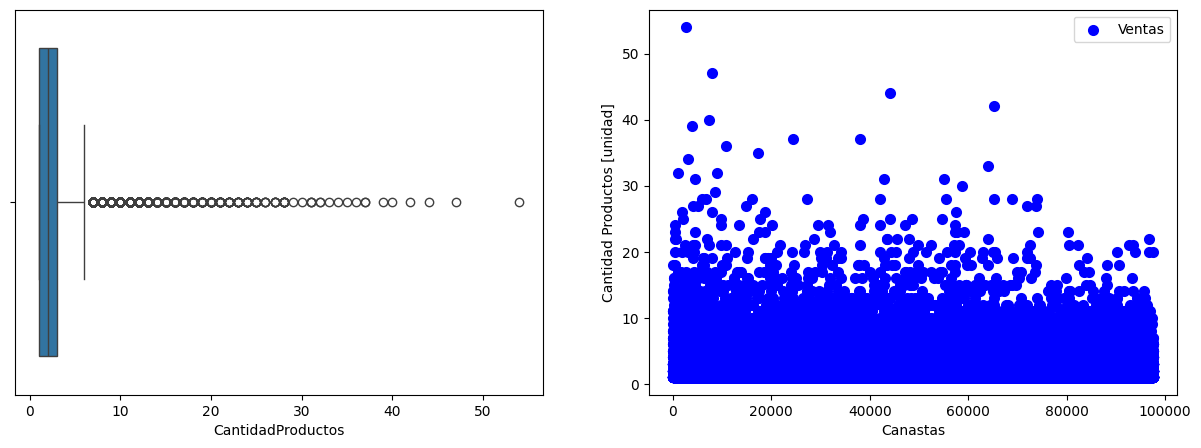

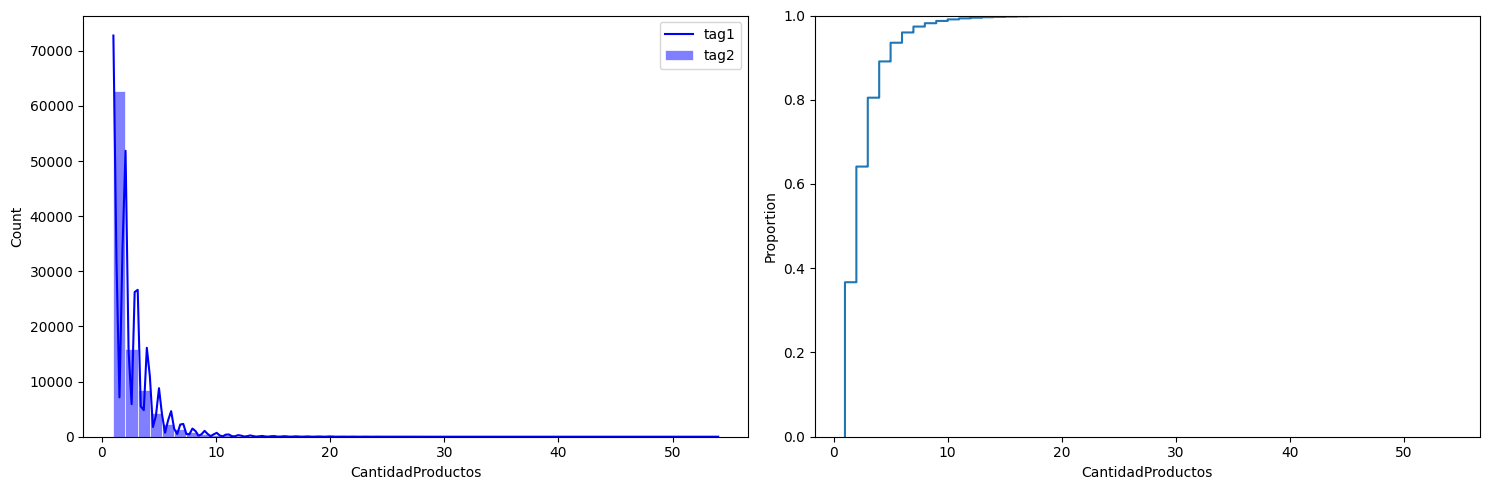

In [89]:
"""
Visualizacion de la distribución de la cantidad de productos en cada canasta.
(izq) gráfico de cajas, (der) scatter
"""

figura_tamaño = (15,5)

fig, axes = plt.subplots(1,2, figsize=figura_tamaño)
# valores a mostrar
x = productos_canasta.index
y = productos_canasta['CantidadProductos']
base_datos = productos_canasta

# muestra boxplot para tag 1 y tag 2
sns.boxplot(data=base_datos, x="CantidadProductos", ax=axes[0])

# grafica los datos 
axes[1].scatter(x, y, linewidth=2.0, color='blue')

plt.xlabel('Canastas') 
plt.ylabel('Cantidad Productos [unidad]') 
plt.legend(["Ventas"], loc="upper right")
plt.show
#---------------------
"""
Visualizacion de la distribución de la cantidad de productos en cada canasta.
(izq) histograma, (der) distribucion acumulativa
"""

fig , axes= plt.subplots(1,2, figsize= figura_tamaño)
axes = axes.ravel()

sns.histplot(y, bins=50, linewidth=0.5, edgecolor="white", color='blue', kde=True, ax=axes[0]) 
axes[0].legend(["tag1", "tag2"], loc="upper right")


# distribución acumulativa
sns.ecdfplot(base_datos, x='CantidadProductos', palette=['blue'], ax=axes[1])

fig.tight_layout()
plt.show()

Se puede verificar que +95% de la distribución está 1 y 15 productos. Y existen casos con mayor cantidad de productos pero son casos menos probable que son identificados como outliers.
Por lo tanto, se toma la decisión de considerar en un análisis hasta 15 productos.

In [108]:
"""
Filtrado de datos para Cantidad <=10
"""
cantidad_productos = 15
canastas_menor10productos = productos_canasta[productos_canasta['CantidadProductos'] <= cantidad_productos]
canastas_mayor10productos = productos_canasta[productos_canasta['CantidadProductos']>= cantidad_productos]

print('Cantidad canastas menor a 10 productos:', len(canastas_menor10productos))
print('Cantidad canastas mayor a 10 productos:', len(canastas_mayor10productos))

#--------------------------
print(f'\ndatos filtrados para menor igual a {cantidad_productos} productos')

canastas_filtradas =datos_canasta[datos_canasta['VenNro'].isin(canastas_menor10productos['VenNro'])]
canastas_filtradas


Cantidad canastas menor a 10 productos: 97385
Cantidad canastas mayor a 10 productos: 326

datos filtrados para menor igual a 15 productos


,EmpCod,VenNro,PrdCod,VenIteCnt,VenItePrc,VenIteIde
0,1,11,952,1.0,2000,V
1,1,11,975,3.0,1000,V
2,1,11,989,6.0,700,V
3,1,11,1178,1.0,500,V
4,1,12,111,2.0,900,V
...,...,...,...,...,...,...
244368,1,97656,1305,1.0,500,V
244369,1,97656,1687,1.0,2200,V
244370,1,97657,991,1.0,850,V
244371,1,97657,1538,1.0,500,V


In [114]:
canastas_filtradas.groupby('VenNro').VenNro.count().reset_index(name='CantidadProductos')

,VenNro,CantidadProductos
0,11,4
1,12,14
2,13,1
3,14,1
4,15,1
...,...,...
97380,97653,2
97381,97654,3
97382,97655,1
97383,97656,2


97711

Productos más vendidos

Cuándo compran los usuarios, análisis temporal

Cuál es el tamaño de la canasta

Qué productos son comprados en: Día, semana, mes

Cuándo las personas compran, análisis por horario

Qué productos no sean comprado

Tamaño de la canasta por día, semana y mes